# Une première utilisation de l'intégrale de Lebesgue

Intégrale de Riemann : 6.939103626372618
Intégrale de Lebesgue : 6.9400172353712755


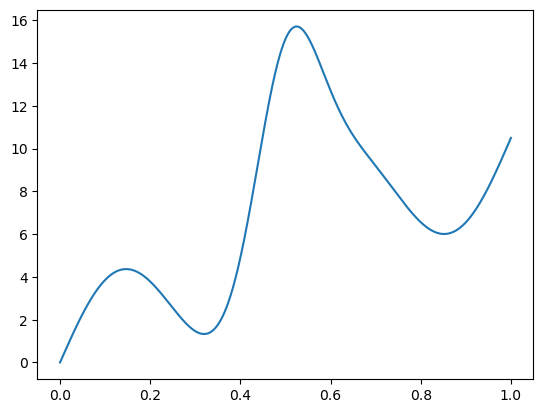

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
a, b, c = 0.5, 10, 3
Left, Right = 0, 1
N = 100000  # nombre de subdivisions pour Riemann
M = 1000    # nombre de niveaux pour Lebesgue

# Fonction à intégrer
def f(x):
    return a*x**2 + b*x + c*np.sin(4*np.pi*x) + 10*np.exp(-100*(x-0.5)**2)

# -----------------------------
# Intégrale de Riemann (somme de rectangles)
# -----------------------------
x_riemann = np.linspace(Left, Right, N)
dx = (Right - Left)/N
integral_riemann = np.sum(f(x_riemann) * dx)
print("Intégrale de Riemann :", integral_riemann)

# -----------------------------
# Intégrale de Lebesgue (approximation)
# -----------------------------
# On approxime l'intégrale comme somme sur les niveaux de f
f_min, f_max = np.min(f(x_riemann)), np.max(f(x_riemann))
levels = np.linspace(f_min, f_max, M)
dy = (f_max - f_min)/M

integral_lebesgue = 0
for y in levels:
    # mes({x | f(x) >= y}) approximée par fraction de points
    measure = np.sum(f(x_riemann) >= y) * dx
    integral_lebesgue += measure * dy

print("Intégrale de Lebesgue :", integral_lebesgue)
plt.plot(x_riemann,f(x_riemann))
plt.show()

## Raffinement de maillage pour obtenir une erreur de 1e-5

Valeur de référence (quad) ≈ 6.93912052

Riemann : N = 100    I = 6.93911635  erreur = 4.17e-06

🔹 Riemann : erreur < 0.001 atteinte pour N = 100 points (erreur = 4.17e-06)

Lebesgue : M = 100    I = 6.92286274  erreur = 1.63e-02
Lebesgue : M = 200    I = 6.93073202  erreur = 8.39e-03
Lebesgue : M = 300    I = 6.93462358  erreur = 4.50e-03
Lebesgue : M = 400    I = 6.93605487  erreur = 3.07e-03
Lebesgue : M = 500    I = 6.93613518  erreur = 2.99e-03
Lebesgue : M = 600    I = 6.93652614  erreur = 2.59e-03
Lebesgue : M = 700    I = 6.93640871  erreur = 2.71e-03
Lebesgue : M = 800    I = 6.93718080  erreur = 1.94e-03
Lebesgue : M = 900    I = 6.93764665  erreur = 1.47e-03
Lebesgue : M = 1000   I = 6.93739360  erreur = 1.73e-03
Lebesgue : M = 1100   I = 6.93764390  erreur = 1.48e-03
Lebesgue : M = 1200   I = 6.93775502  erreur = 1.37e-03
Lebesgue : M = 1300   I = 6.93792320  erreur = 1.20e-03
Lebesgue : M = 1400   I = 6.93776808  erreur = 1.35e-03
Lebesgue : M = 1500   I = 6.93796689  erre

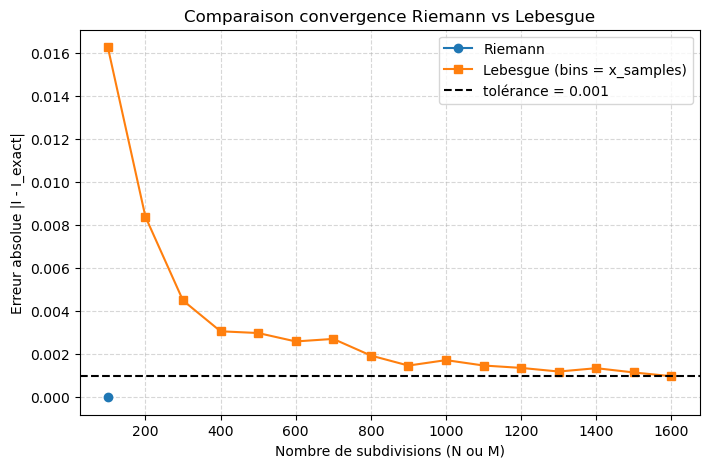

In [4]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# -----------------------------
# Définition de la fonction
# -----------------------------
def f(x, a=0.5, b=10.0, c=3.0):
    return a*x**2 + b*x + c*np.sin(4*np.pi*x) + 10*np.exp(-100*(x-0.5)**2)

Left, Right = 0.0, 1.0
a, b, c = 0.5, 10.0, 3.0
tol = 1e-3

# -----------------------------
# Valeur de référence (exacte)
# -----------------------------
I_exact, _ = quad(lambda x: f(x, a, b, c), Left, Right)
print(f"Valeur de référence (quad) ≈ {I_exact:.8f}\n")

# =====================================================
# MÉTHODE DE RIEMANN (point milieu)
# =====================================================
def riemann_integral(N):
    dx = (Right - Left) / N
    x_vals = Left + dx * (0.5 + np.arange(N))
    return np.sum(f(x_vals, a, b, c)) * dx

N = 100  # départ
step = 100
errors_riemann = []
Ns_riemann = []

while True:
    I_riem = riemann_integral(N)
    err = abs(I_riem - I_exact)
    errors_riemann.append(err)
    Ns_riemann.append(N)
    print(f"Riemann : N = {N:<5d}  I = {I_riem:.8f}  erreur = {err:.2e}")
    if err < tol:
        N_riem_min = N
        break
    N += step

print(f"\n🔹 Riemann : erreur < {tol} atteinte pour N = {N_riem_min} points (erreur = {err:.2e})\n")

# =====================================================
# MÉTHODE DE LEBESGUE (bins = x_samples)
# =====================================================
def lebesgue_integral(M):
    xs = np.linspace(Left, Right, M)
    fx = f(xs, a, b, c)
    f_min, f_max = fx.min(), fx.max()
    edges = np.linspace(f_min, f_max, M + 1)  # même nombre de bins
    counts, _ = np.histogram(fx, bins=edges)
    meas = (Right - Left) * counts / len(xs)
    y_lower = edges[:-1]
    y_upper = edges[1:]
    lower = np.sum(y_lower * meas)
    upper = np.sum(y_upper * meas)
    return 0.5 * (lower + upper)

M = 100
errors_lebesgue = []
Ms_lebesgue = []

while True:
    I_leb = lebesgue_integral(M)
    err = abs(I_leb - I_exact)
    errors_lebesgue.append(err)
    Ms_lebesgue.append(M)
    print(f"Lebesgue : M = {M:<5d}  I = {I_leb:.8f}  erreur = {err:.2e}")
    if err < tol:
        M_leb_min = M
        break
    M += step

print(f"\n🔹 Lebesgue : erreur < {tol} atteinte pour M = {M_leb_min} bins (erreur = {err:.2e})\n")

# =====================================================
# GRAPHIQUE COMPARATIF
# =====================================================
plt.figure(figsize=(8,5))
plt.plot(Ns_riemann, errors_riemann, 'o-', label='Riemann')
plt.plot(Ms_lebesgue, errors_lebesgue, 's-', label='Lebesgue (bins = x_samples)')
plt.axhline(tol, color='k', linestyle='--', label=f'tolérance = {tol}')
plt.xlabel("Nombre de subdivisions (N ou M)")
plt.ylabel("Erreur absolue |I - I_exact|")
plt.title("Comparaison convergence Riemann vs Lebesgue")
plt.legend()
plt.grid(True, ls="--", alpha=0.5)
plt.show()


## Test de l'erreur via une suite de Cauchy

In [9]:
import numpy as np
from scipy.integrate import quad

# ------------------------------------------------------------
# Fonction à intégrer
# ------------------------------------------------------------
def f(x, a=0.5, b=10.0, c=3.0):
    return a*x**2 + b*x + c*np.sin(4*np.pi*x) + 10*np.exp(-100*(x-0.5)**2)

Left, Right = 0.0, 1.0
a, b, c = 0.5, 10.0, 3.0
tol = 1e-3

# Valeur de référence (juste pour affichage)
I_exact, _ = quad(lambda x: f(x, a, b, c), Left, Right)
print(f"Valeur de référence (quad) ≈ {I_exact:.10f}\n")

# ------------------------------------------------------------
# Méthode de Lebesgue
# ------------------------------------------------------------
def lebesgue_integral(M, M_bins=32):
    xs = np.linspace(Left, Right, M)
    fx = f(xs, a, b, c)
    f_min, f_max = fx.min(), fx.max()
    edges = np.linspace(f_min, f_max, M_bins + 1)
    counts, _ = np.histogram(fx, bins=edges)
    meas = (Right - Left) * counts / len(xs)
    y_lower = edges[:-1]
    y_upper = edges[1:]
    lower = np.sum(y_lower * meas)
    upper = np.sum(y_upper * meas)
    return 0.5 * (lower + upper)

# ------------------------------------------------------------
# Boucle avec critère de Cauchy
# ------------------------------------------------------------
M = 100        # maillage initial
M_bins = 100   # nombre de bins initial
I_prev = None  # valeur précédente
k = 0

while True:
    k += 1
    I_curr = lebesgue_integral(M, M_bins)

    if I_prev is not None:
        diff = abs(I_curr - I_prev)
        print(f"[it={k}] M = {M:<6d}  I = {I_curr:.10f}  |ΔI| = {diff:.2e}")
        if diff < tol:
            print("\n✅ Critère de Cauchy atteint !")
            break
    else:
        print(f"[it={k}] M = {M:<6d}  I = {I_curr:.10f}  (première itération)")

    I_prev = I_curr
    M += 100
    M_bins += 100

# ------------------------------------------------------------
# Résumé
# ------------------------------------------------------------
err = abs(I_curr - I_exact)
print("\n--- Résumé ---")
print(f"Intégrale Lebesgue ≈ {I_curr:.10f}")
print(f"Erreur absolue (par rapport à quad) = {err:.2e}")
print(f"Nombre de points M = {M}")
print(f"Nombre de bins M_bins = {M_bins}")
print(f"Itérations = {k}")


Valeur de référence (quad) ≈ 6.9391205176

[it=1] M = 100     I = 6.9228627416  (première itération)
[it=2] M = 200     I = 6.9307320224  |ΔI| = 7.87e-03
[it=3] M = 300     I = 6.9346235796  |ΔI| = 3.89e-03
[it=4] M = 400     I = 6.9360548702  |ΔI| = 1.43e-03
[it=5] M = 500     I = 6.9361351802  |ΔI| = 8.03e-05

✅ Critère de Cauchy atteint !

--- Résumé ---
Intégrale Lebesgue ≈ 6.9361351802
Erreur absolue (par rapport à quad) = 2.99e-03
Nombre de points M = 500
Nombre de bins M_bins = 500
Itérations = 5


## Controle de la métrique et critère d'arret de Cauchy

Référence quad (info) ≈ 6.93912052

[it=1] M=100    I=6.93793484  (première itération)
[it=2] M=200    I=6.94178210  |ΔI|=3.85e-03  (gap=7.54e-02)
[it=3] M=300    I=6.93745650  |ΔI|=4.33e-03  (gap=5.08e-02)
[it=4] M=400    I=6.94005895  |ΔI|=2.60e-03  (gap=3.83e-02)
[it=5] M=500    I=6.93952161  |ΔI|=5.37e-04  (gap=3.07e-02)

✅ Critère de Cauchy atteint.

--- Résumé ---
I (Lebesgue pondéré) ≈ 6.93952161
Erreur vs quad (info) = 4.01e-04
Maillage final: M_cells = 500  (bins = 500)
Itérations = 5


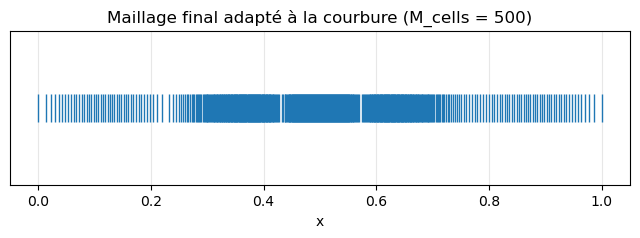

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# -----------------------------
# f et f'' (pour la métrique)
# -----------------------------
def f(x, a=0.5, b=10.0, c=3.0):
    return a*x**2 + b*x + c*np.sin(4*np.pi*x) + 10*np.exp(-100*(x-0.5)**2)

def f2(x, a=0.5, c=3.0):
    # dérivée seconde analytique
    return (2*a
            - (4*np.pi)**2 * c * np.sin(4*np.pi*x)
            + 10 * (-2000 + 400000*(x-0.5)**2) * np.exp(-100*(x-0.5)**2))

# -----------------------------
# Paramètres
# -----------------------------
Left, Right = 0.0, 1.0
a, b, c = 0.5, 10.0, 3.0
tol = 1e-3                 # critère de Cauchy |I_{k+1}-I_k|
eps_metric = 1e-4
hmin, hmax = 1e-4, 0.2

# (Info) Valeur de référence pour vérifier à la fin
I_exact, _ = quad(lambda x: f(x, a, b, c), Left, Right)
print(f"Référence quad (info) ≈ {I_exact:.8f}\n")  # devrait être ≈ 6.93912052

# -----------------------------
# Métrique et maillage adapté
# -----------------------------
def build_curvature_mesh(M_cells, eps=eps_metric, hmin=hmin, hmax=hmax, refN=5000):
    """
    Construit un maillage adapté {x_j}_{j=0..M_cells} (M_cells cellules, M_cells+1 noeuds)
    en équidistribuant l'arclength dans la métrique sqrt(lambda(x)),
    avec lambda(x) ~ |f''(x)|/eps bornée par [1/hmax^2, 1/hmin^2].
    """
    xr = np.linspace(Left, Right, refN)
    lam = np.abs(f2(xr, a, c)) / eps
    lam = np.clip(lam, 1.0/(hmax**2), 1.0/(hmin**2))
    rho = np.sqrt(lam)

    s = np.cumsum(0.5*(rho[1:]+rho[:-1]) * np.diff(xr))
    s = np.insert(s, 0, 0.0)
    S = s[-1]

    targets = np.linspace(0.0, S, M_cells+1)
    x_nodes = np.interp(targets, s, xr)
    return x_nodes  # longueur M_cells+1

# -----------------------------
# Intégrale de Lebesgue pondérée (maillage non uniforme)
# -----------------------------
def lebesgue_weighted(nodes, nbins):
    """
    nodes: array des noeuds (taille M_cells+1)
    nbins: nombre de bins sur l'axe des valeurs (on prend nbins = M_cells)
    - On évalue f au milieu de chaque cellule
    - Poids = longueur de cellule dx
    - Histogramme pondéré par dx -> mesure(E_i)
    """
    x_nodes = nodes
    dx = np.diff(x_nodes)                      # poids (mesure locale)
    x_mid = 0.5*(x_nodes[:-1] + x_nodes[1:])   # milieux
    y_mid = f(x_mid, a, b, c)

    ymin, ymax = y_mid.min(), y_mid.max()
    pad = 1e-12 * (abs(ymin)+abs(ymax)+1.0)
    edges = np.linspace(ymin - pad, ymax + pad, nbins+1)

    # mesure(E_i) = somme des dx des cellules dont y_mid tombe dans le bin
    meas, _ = np.histogram(y_mid, bins=edges, weights=dx)

    y_lower = edges[:-1]
    y_upper = edges[1:]

    lower = np.sum(y_lower * meas)
    upper = np.sum(y_upper * meas)

    I = 0.5*(lower + upper)
    gap = upper - lower  # utile si tu veux aussi contrôler upper-lower
    return I, gap

# -----------------------------
# Boucle Cauchy + maillage métrique (M = M_bins)
# -----------------------------
M_cells = 100
I_prev = None
k = 0
nodes_final = None
I_curr = None

while True:
    k += 1
    nbins = M_cells  # contrainte M = M_bins (ici nbins = nb cellules)

    nodes = build_curvature_mesh(M_cells)
    I_curr, gap = lebesgue_weighted(nodes, nbins)

    if I_prev is not None:
        diff = abs(I_curr - I_prev)
        print(f"[it={k}] M={M_cells:<5d}  I={I_curr:.8f}  |ΔI|={diff:.2e}  (gap={gap:.2e})")
        if diff < tol:
            print("\n✅ Critère de Cauchy atteint.")
            nodes_final = nodes
            break
    else:
        print(f"[it={k}] M={M_cells:<5d}  I={I_curr:.8f}  (première itération)")

    I_prev = I_curr
    M_cells += 100  # raffinement progressif

# -----------------------------
# Résumé & visualisation finale
# -----------------------------
err_abs = abs(I_curr - I_exact)
print("\n--- Résumé ---")
print(f"I (Lebesgue pondéré) ≈ {I_curr:.8f}")
print(f"Erreur vs quad (info) = {err_abs:.2e}")
print(f"Maillage final: M_cells = {M_cells}  (bins = {M_cells})")
print(f"Itérations = {k}")

plt.figure(figsize=(8,2))
plt.plot(nodes_final, np.zeros_like(nodes_final), '|', markersize=20)
plt.title(f"Maillage final adapté à la courbure (M_cells = {M_cells})")
plt.xlabel("x")
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.show()


# Approximation de Pi via des calculs d'intégrales

In [5]:
import math
import random
# Fonction à intégrer
f = lambda x: 4/(1+x**2)
a, b = 0, 1

# Valeur exacte via erf
I_exact = math.pi

# Méthode Riemann
def riemann_integral(f, a, b, N):
    dx = (b - a)/N
    total = 0.0
    for i in range(N):
        xi = a + i*dx
        total += f(xi)*dx
    return total

# Méthode Lebesgue
def lebesgue_integral(f, a, b, Nx, Ny):
    x_vals = [a + i*(b-a)/Nx for i in range(Nx)]
    f_vals = [f(x) for x in x_vals]
    f_max = max(f_vals)
    dy = f_max/Ny
    total = 0.0
    for j in range(Ny):
        yj = j*dy
        measure = 0.0
        for x in x_vals:
            if f(x) > yj:
                measure += (b-a)/Nx
        total += measure*dy
    return total

# Méthode Monte-Carlo
def monte_carlo_integral(f, a, b, N):
    total = 0.0
    for _ in range(N):
        x = a + (b-a)*random.random()
        total += f(x)
    return (b-a)*total/N

# Paramètres
N_riemann = 10
Nx, Ny = 10, 10
N_mc = 10

# Calcul des intégrales
I_riemann = riemann_integral(f, a, b, N_riemann)
I_lebesgue = lebesgue_integral(f, a, b, Nx, Ny)
I_mc = monte_carlo_integral(f, a, b, N_mc)

# Affichage du tableau comparatif
print("{:<15} {:<20} {:<20}".format("Méthode", "Intégrale approx.", "Erreur relative"))
print("-"*55)
print("{:<15} {:<20.8f} {:<20.8f}".format("Riemann", I_riemann, abs(I_riemann-I_exact)/I_exact))
print("{:<15} {:<20.8f} {:<20.8f}".format("Lebesgue", I_lebesgue, abs(I_lebesgue-I_exact)/I_exact))
print("{:<15} {:<20.8f} {:<20.8f}".format("Monte-Carlo", I_mc, abs(I_mc-I_exact)/I_exact))
print("{:<15} {:<20.8f}".format("Exacte", I_exact, 0.0))


Méthode         Intégrale approx.    Erreur relative     
-------------------------------------------------------
Riemann         3.23992599           0.03130047          
Lebesgue        3.40000000           0.08225361          
Monte-Carlo     3.06016741           0.02591846          
Exacte          3.14159265          


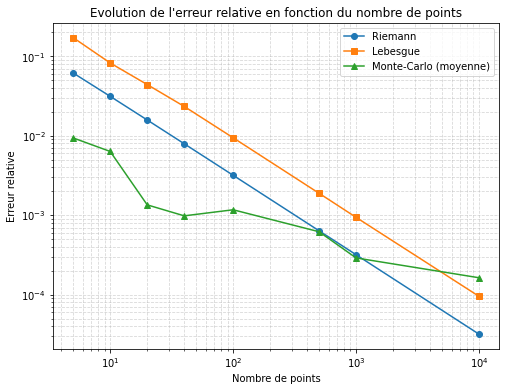

In [4]:
import math
import random
import matplotlib.pyplot as plt
# Fonction à intégrer
f = lambda x: 4/(1+x**2)
a, b = 0, 1

# Valeur exacte via erf
I_exact = math.pi

# Méthode Riemann
def riemann_integral(f, a, b, N):
    dx = (b - a)/N
    total = 0.0
    for i in range(N):
        xi = a + i*dx
        total += f(xi)*dx
    return total

# Méthode Lebesgue
def lebesgue_integral(f, a, b, Nx, Ny):
    x_vals = [a + i*(b-a)/Nx for i in range(Nx)]
    f_vals = [f(x) for x in x_vals]
    f_max = max(f_vals)
    dy = f_max/Ny
    total = 0.0
    for j in range(Ny):
        yj = j*dy
        measure = 0.0
        for x in x_vals:
            if f(x) > yj:
                measure += (b-a)/Nx
        total += measure*dy
    return total

# Méthode Monte-Carlo moyenne sur M tirages
def monte_carlo_integral(f, a, b, N, M=10):
    total = 0.0
    for _ in range(M):
        s = 0.0
        for _ in range(N):
            x = a + (b-a)*random.random()
            s += f(x)
        total += (b-a)*s/N
    return total/M

# Liste des nombres de points
N_points = [5, 10, 20, 40, 100, 500, 1000, 10000]

# Tableaux pour stocker les erreurs relatives
err_riemann = []
err_lebesgue = []
err_mc = []

for N in N_points:
    I_r = riemann_integral(f, a, b, N)
    I_l = lebesgue_integral(f, a, b, Nx=N, Ny=N)
    I_m = monte_carlo_integral(f, a, b, N, M=50)
    
    err_riemann.append(abs(I_r - I_exact)/I_exact)
    err_lebesgue.append(abs(I_l - I_exact)/I_exact)
    err_mc.append(abs(I_m - I_exact)/I_exact)

# Plot des erreurs relatives
plt.figure(figsize=(8,6))
plt.loglog(N_points, err_riemann, 'o-', label='Riemann')
plt.loglog(N_points, err_lebesgue, 's-', label='Lebesgue')
plt.loglog(N_points, err_mc, '^-', label='Monte-Carlo (moyenne)')
plt.xlabel('Nombre de points')
plt.ylabel('Erreur relative')
plt.title('Evolution de l\'erreur relative en fonction du nombre de points')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()


# ADRS_multiple_mesh_adapt.py

NX= 8 Dt= 0.05172084342023556
iter= 33 residual= 0.0006021986455240495
iter= 33 time= 1.7067878328677741 residual= 0.0006021986455240495
norm error L2, H1= 0.15967409082372994 2.1050625367114155
----------------------------------
NX= 25 Dt= 0.01180541602068137
iter= 112 residual= 0.0016841739743769213
iter= 112 time= 1.322206594316313 residual= 0.0016841739743769213
norm error L2, H1= 0.019131897048811082 4.588746719770155
----------------------------------
NX= 43 Dt= 0.007634889695081362
iter= 163 residual= 0.0019908528342445124
iter= 163 time= 1.2444870202982634 residual= 0.0019908528342445124
norm error L2, H1= 0.006671865858585013 2.1428120091486074
----------------------------------
NX= 44 Dt= 0.007898086678036072
iter= 158 residual= 0.0021023976231632994
iter= 158 time= 1.2478976951296974 residual= 0.0021023976231632994
norm error L2, H1= 0.006170518730098248 2.0272117740400306
----------------------------------


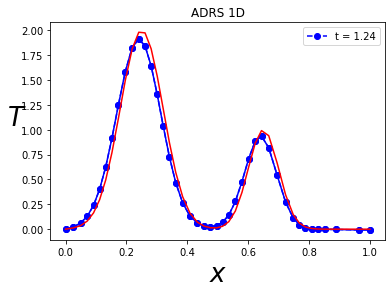

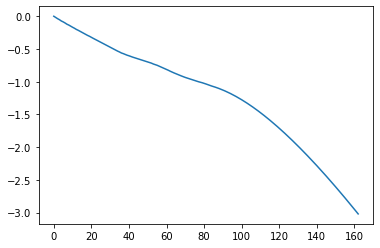

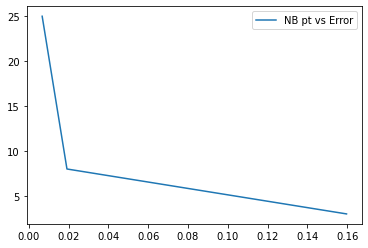

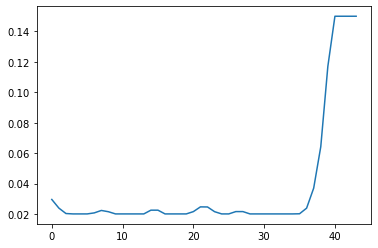

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

def adrs_fct(n, x):
#u,t = -V u,x + k u,xx  -lamda u + f
    u=np.ones(n)
    return u

def metric_fct(n, u):
#calcul metric hloc
    hloc=np.ones(n)
    return hloc

def mesh_fct(n, hloc):
#calcul metric hloc
    x=np.ones(n)
    return x

iplot=0

# PHYSICAL PARAMETERS
K = 0.01     #Diffusion coefficient
xmin = 0.0
xmax = 1.0    
Time = 10.  #Integration time

V=1.
lamda=1

#mesh adaptation param

niter_refinement=30      #niter different calculations
hmin=0.02
hmax=0.15
err=0.03

# NUMERICAL PARAMETERS
NX = 3    #Number of grid points : initialization
NT = 10000   #Number of time steps max
ifre=1000000  #plot every ifre time iterations
eps=0.001     #relative convergence ratio

errorL2=np.zeros((niter_refinement))
errorH1=np.zeros((niter_refinement))
itertab=np.zeros((niter_refinement))
hloc = np.ones((NX))*hmax

itera=0
NX0=0
while( np.abs(NX0-NX) > 2 and itera<niter_refinement-1):

    itera+=1
    itertab[itera]=1./NX

    iplot=itera-2
    
    x = np.linspace(xmin,xmax,NX)
    T = np.zeros((NX))

#mesh adaptation using local metric
    if(itera>0):
        xnew=[]
        Tnew=[]        
        nnew=1
        xnew.append(xmin)
        Tnew.append(T[0])        
        while(xnew[nnew-1] < xmax-hmin):
            for i in range(0,NX-1):
                if(xnew[nnew-1] >= x[i] and xnew[nnew-1] <= x[i+1] and xnew[nnew-1]<xmax-hmin):
                    hll=(hloc[i]*(x[i+1]-xnew[nnew-1])+hloc[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    hll=min(max(hmin,hll),hmax)
                    nnew+=1
#                    print(nnew,hll,min(xmax,xnew[nnew-2]+hll))
                    xnew.append(min(xmax,xnew[nnew-2]+hll))                
#solution interpolation for initialization (attention initial solution on first mesh in the row)
                    un=(T[i]*(x[i+1]-xnew[nnew-1])+T[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    Tnew.append(un)
                    
        NX0=NX
        NX=nnew
        x = np.zeros((NX))
        x[0:NX]=xnew[0:NX]
        T = np.zeros((NX))
        T[0:NX]=Tnew[0:NX]
#        T[NX-1]=0
    
    rest = []
    F = np.zeros((NX))
    RHS = np.zeros((NX))
    hloc = np.ones((NX))*hmax*0.5
    metric = np.ones((NX))

    Tex = np.zeros((NX))
    for j in range (1,NX-1):
        Tex[j] = 2*np.exp(-100*(x[j]-(xmax+xmin)*0.25)**2)+np.exp(-200*(x[j]-(xmax+xmin)*0.65)**2)
        
    dt=1.e30
    for j in range (1,NX-1):
        Tx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Txip1=(Tex[j+1]-Tex[j])/(x[j+1]-x[j])
        Txim1=(Tex[j]-Tex[j-1])/(x[j]-x[j-1])
        Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))
        F[j]=V*Tx-K*Txx+lamda*Tex[j]
        dt=min(dt,0.5*(x[j+1]-x[j-1])**2/(V*np.abs(x[j+1]-x[j-1])+4*K+np.abs(F[j])*(x[j+1]-x[j-1])**2))

    print('NX=',NX,'Dt=',dt)        

    if(iplot==1):
        plt.figure(1)

    #time step loop
    n=0
    res=1
    res0=1
    t=0
    while(n<NT and res/res0>eps and t<Time):
        n+=1
        t+=dt
    #discretization of the advection/diffusion/reaction/source equation
        res=0
        for j in range (1, NX-1):
            visnum=0.5*(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*np.abs(V)
            xnu=K+visnum            
            Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
            Txip1=(T[j+1]-T[j])/(x[j+1]-x[j])
            Txim1=(T[j]-T[j-1])/(x[j]-x[j-1])
            Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))            
            RHS[j] = dt*(-V*Tx+xnu*Txx-lamda*T[j]+F[j])
            metric[j]=min(1./hmin**2,max(1./hmax**2,abs(Txx)/err))
            res+=abs(RHS[j])

        metric[0]=metric[1]
        
        metric[NX-1]=metric[NX-2]    #ux a droite = 0
        #metric[NX-1]=2*metric[NX-2]-metric[NX-3]   #uxx a droite =0

        for j in range (0, NX-1):
            metric[j]=0.5*(metric[j]+metric[j+1])
        metric[NX-1]=metric[NX-2]
        
        hloc[0:NX]=np.sqrt(1./metric[0:NX])

        for j in range (1, NX-1):
            T[j] += RHS[j]
            RHS[j]=0
        
        T[NX-1]=T[NX-2] #1.2*T[NX-2]-0.2*T[NX-3]

        if (n == 1 ):
            res0=res

        rest.append(res)
    #Plot every ifre time steps
        if (n%ifre == 0 or (res/res0)<eps):
            print('iter=',n,'residual=',res)
            if(iplot==1):
                plotlabel = "t = %1.2f" %(n * dt)
                plt.plot(x[0:NX],T[0:NX], label=plotlabel,linestyle='--', marker='o', color='b')
          

    print('iter=',n,'time=',t,'residual=',res)
    if(iplot==1):
        plt.plot(x[0:NX],T[0:NX],marker='o', color='b')
        plt.plot(x[0:NX],Tex[0:NX],color='r')        
        plt.xlabel(u'$x$', fontsize=26)
        plt.ylabel(u'$T$', fontsize=26, rotation=0)
        plt.title(u'ADRS 1D')
        plt.legend()
        plt.figure(2)
        plt.plot(np.log10(rest/rest[0]))


#    errL2=np.sqrt(np.dot(T-Tex,T-Tex))
    errH1h=0
    errL2h=0
    for j in range (1, NX-1):
        Texx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
        errL2h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(T[j]-Tex[j])**2
        errH1h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(Tx-Texx)**2

    errorL2[itera]=errL2h
    errorH1[itera]=errL2h+errH1h
    
    
    print('norm error L2, H1=',errL2h,errH1h)
    print('----------------------------------')

if(iplot==-1):
    plt.figure(3)
    plt.plot(itertab,np.log10(errorL2))
    plt.plot(itertab,np.log10(errorH1))

plt.show()


plt.plot(errorL2[1:itera],1/itertab[1:itera],label="NB pt vs Error")
plt.legend()
plt.show()

plt.plot(hloc)

### Premier Workflow

NX= 8 Dt= 0.05172084342023556
iter= 33 residual= 0.0006021986455240495
iter= 33 time= 1.7067878328677741 residual= 0.0006021986455240495
norm error L2, H1= 0.15967409082372994 2.1050625367114155
----------------------------------
NX= 25 Dt= 0.01180541602068137
iter= 112 residual= 0.0016841739743769213
iter= 112 time= 1.322206594316313 residual= 0.0016841739743769213
Cauchy Ik = 4.184e-01
norm error L2, H1= 0.019131897048811082 4.588746719770155
----------------------------------
NX= 43 Dt= 0.007634889695081362
iter= 163 residual= 0.0019908528342445124
iter= 163 time= 1.2444870202982634 residual= 0.0019908528342445124
Cauchy Ik = 7.020e-02
norm error L2, H1= 0.006671865858585013 2.1428120091486074
----------------------------------
NX= 44 Dt= 0.007898086678036072
iter= 158 residual= 0.0021023976231632994
iter= 158 time= 1.2478976951296974 residual= 0.0021023976231632994
Cauchy Ik = 1.289e-02
norm error L2, H1= 0.006170518730098248 2.0272117740400306
----------------------------------


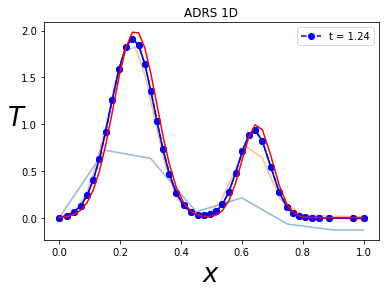

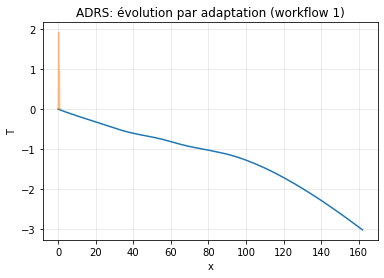

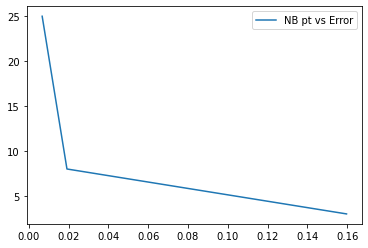

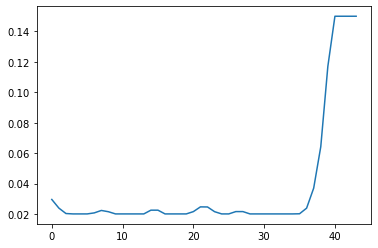

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

def adrs_fct(n, x):
#u,t = -V u,x + k u,xx  -lamda u + f
    u=np.ones(n)
    return u

def metric_fct(n, u):
#calcul metric hloc
    hloc=np.ones(n)
    return hloc

def mesh_fct(n, hloc):
#calcul metric hloc
    x=np.ones(n)
    return x

iplot=0

# PHYSICAL PARAMETERS
K = 0.01     #Diffusion coefficient
xmin = 0.0
xmax = 1.0    
Time = 10.  #Integration time

V=1.
lamda=1

# ---- (ajout) : background mesh + critère de Cauchy ----
xB = np.linspace(xmin, xmax, 4000)
tol_cauchy = 1e-3
YB_prev = None
# --------------------------------------------------------

# ---- (ajout) : figure pour tracé multi-étapes ----------
show_progress = True
plt.figure("Evolution T(x) par adaptation - WF1")
# --------------------------------------------------------

# mesh adaptation param
niter_refinement=30
hmin=0.02
hmax=0.15
err=0.03

# NUMERICAL PARAMETERS
NX = 3
NT = 10000
ifre=1000000
eps=0.001

errorL2=np.zeros((niter_refinement))
errorH1=np.zeros((niter_refinement))
itertab=np.zeros((niter_refinement))
hloc = np.ones((NX))*hmax

itera=0
NX0=0
while( np.abs(NX0-NX) > 2 and itera<niter_refinement-1):

    itera+=1
    itertab[itera]=1./NX

    iplot=itera-2
    
    x = np.linspace(xmin,xmax,NX)
    T = np.zeros((NX))

    # mesh adaptation using local metric
    if(itera>0):
        xnew=[]
        Tnew=[]        
        nnew=1
        xnew.append(xmin)
        Tnew.append(T[0])        
        while(xnew[nnew-1] < xmax-hmin):
            for i in range(0,NX-1):
                if(xnew[nnew-1] >= x[i] and xnew[nnew-1] <= x[i+1] and xnew[nnew-1]<xmax-hmin):
                    hll=(hloc[i]*(x[i+1]-xnew[nnew-1])+hloc[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    hll=min(max(hmin,hll),hmax)
                    nnew+=1
                    xnew.append(min(xmax,xnew[nnew-2]+hll))
                    # interpolation de T (initialisation)
                    un=(T[i]*(x[i+1]-xnew[nnew-1])+T[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    Tnew.append(un)
                    
        NX0=NX
        NX=nnew
        x = np.zeros((NX))
        x[0:NX]=xnew[0:NX]
        T = np.zeros((NX))
        T[0:NX]=Tnew[0:NX]
    
    rest = []
    F = np.zeros((NX))
    RHS = np.zeros((NX))
    hloc = np.ones((NX))*hmax*0.5
    metric = np.ones((NX))

    Tex = np.zeros((NX))
    for j in range (1,NX-1):
        Tex[j] = 2*np.exp(-100*(x[j]-(xmax+xmin)*0.25)**2)+np.exp(-200*(x[j]-(xmax+xmin)*0.65)**2)
        
    dt=1.e30
    for j in range (1,NX-1):
        Tx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Txip1=(Tex[j+1]-Tex[j])/(x[j+1]-x[j])
        Txim1=(Tex[j]-Tex[j-1])/(x[j]-x[j-1])
        Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))
        F[j]=V*Tx-K*Txx+lamda*Tex[j]
        dt=min(dt,0.5*(x[j+1]-x[j-1])**2/(V*np.abs(x[j+1]-x[j-1])+4*K+np.abs(F[j])*(x[j+1]-x[j-1])**2))

    print('NX=',NX,'Dt=',dt)        

    if(iplot==1):
        plt.figure(1)

    # time step loop
    n=0
    res=1
    res0=1
    t=0
    while(n<NT and res/res0>eps and t<Time):
        n+=1
        t+=dt
        res=0
        for j in range (1, NX-1):
            visnum=0.5*(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*np.abs(V)
            xnu=K+visnum            
            Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
            Txip1=(T[j+1]-T[j])/(x[j+1]-x[j])
            Txim1=(T[j]-T[j-1])/(x[j]-x[j-1])
            Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))            
            RHS[j] = dt*(-V*Tx+xnu*Txx-lamda*T[j]+F[j])
            metric[j]=min(1./hmin**2,max(1./hmax**2,abs(Txx)/err))
            res+=abs(RHS[j])

        metric[0]=metric[1]
        metric[NX-1]=metric[NX-2]

        for j in range (0, NX-1):
            metric[j]=0.5*(metric[j]+metric[j+1])
        metric[NX-1]=metric[NX-2]
        
        hloc[0:NX]=np.sqrt(1./metric[0:NX])

        for j in range (1, NX-1):
            T[j] += RHS[j]
            RHS[j]=0
        
        T[NX-1]=T[NX-2]

        if (n == 1 ):
            res0=res

        rest.append(res)

        if (n%ifre == 0 or (res/res0)<eps):
            print('iter=',n,'residual=',res)
            if(iplot==1):
                plotlabel = "t = %1.2f" %(n * dt)
                plt.plot(x[0:NX],T[0:NX], label=plotlabel,linestyle='--', marker='o', color='b')
          
    print('iter=',n,'time=',t,'residual=',res)

    # ---- (ajout) : tracer la solution à chaque adaptation ----
    if show_progress:
        plt.plot(x, T, '-', alpha=0.5)
    # ----------------------------------------------------------

    # ---- projection background + Cauchy (WF1) ----
    YB = np.interp(xB, x, T)
    if YB_prev is not None:
        Ik = np.sqrt(np.trapz((YB - YB_prev)**2, xB))
        print(f'Cauchy Ik = {Ik:.3e}')
        if Ik < tol_cauchy:
            print('✅ Critère de Cauchy atteint : arrêt de l’adaptation.')
            break
    YB_prev = YB.copy()
    # ----------------------------------------------

    if(iplot==1):
        plt.plot(x[0:NX],T[0:NX],marker='o', color='b')
        plt.plot(x[0:NX],Tex[0:NX],color='r')        
        plt.xlabel(u'$x$', fontsize=26)
        plt.ylabel(u'$T$', fontsize=26, rotation=0)
        plt.title(u'ADRS 1D')
        plt.legend()
        plt.figure(2)
        plt.plot(np.log10(rest/rest[0]))

    errH1h=0
    errL2h=0
    for j in range (1, NX-1):
        Texx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
        errL2h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(T[j]-Tex[j])**2
        errH1h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(Tx-Texx)**2

    errorL2[itera]=errL2h
    errorH1[itera]=errL2h+errH1h
    print('norm error L2, H1=',errL2h,errH1h)
    print('----------------------------------')

# ---- (ajout) : finaliser la figure d’évolution ----
if show_progress:
    plt.xlabel("x"); plt.ylabel("T")
    plt.title("ADRS: évolution par adaptation (workflow 1)")
    plt.grid(True, alpha=0.3)
# --------------------------------------------------

if(iplot==-1):
    plt.figure(3)
    plt.plot(itertab,np.log10(errorL2))
    plt.plot(itertab,np.log10(errorH1))

plt.show()

plt.plot(errorL2[1:itera],1/itertab[1:itera],label="NB pt vs Error")
plt.legend()
plt.show()

plt.plot(hloc)


### Second Workflow

NX= 8 Dt= 0.05172084342023556
iter= 33 residual= 0.0006021986455240495
iter= 33 time= 1.7067878328677741 residual= 0.0006021986455240495
norm error L2, H1= 0.15967409082372994 2.1050625367114155
----------------------------------
NX= 25 Dt= 0.01178864148943053
iter= 97 residual= 0.0014715386835857688
iter= 97 time= 1.1434982244747607 residual= 0.0014715386835857688
Cauchy Ik = 4.211e-01
norm error L2, H1= 0.018085733097822607 4.522077151124964
----------------------------------
NX= 40 Dt= 0.007430241465423633
iter= 108 residual= 0.0010563628614907168
iter= 108 time= 0.802466078265751 residual= 0.0010563628614907168
Cauchy Ik = 6.932e-02
norm error L2, H1= 0.006385254501066739 2.084604123692186
----------------------------------
NX= 40 Dt= 0.0077083056771561605
iter= 102 residual= 0.0002725602090546944
iter= 102 time= 0.7862471790699288 residual= 0.0002725602090546944
Cauchy Ik = 9.164e-03
norm error L2, H1= 0.006073746151591898 1.9589484836332234
----------------------------------


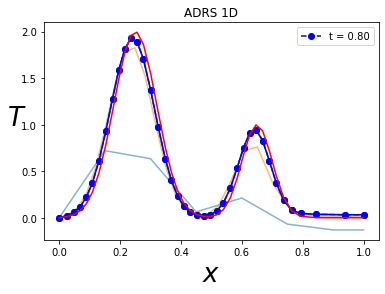

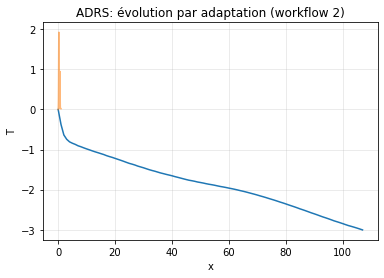

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

def adrs_fct(n, x):
#u,t = -V u,x + k u,xx  -lamda u + f
    u=np.ones(n)
    return u

def metric_fct(n, u):
#calcul metric hloc
    hloc=np.ones(n)
    return hloc

def mesh_fct(n, hloc):
#calcul metric hloc
    x=np.ones(n)
    return x

iplot=0

# PHYSICAL PARAMETERS
K = 0.01     #Diffusion coefficient
xmin = 0.0
xmax = 1.0    
Time = 10.  #Integration time

V=1.
lamda=1

# >>> MODIF (workflow 2): background mesh + tolérance Cauchy
xB = np.linspace(xmin, xmax, 4000)
tol_cauchy = 1e-3
YB_prev = None
# ----------------------------------------------------------

# >>> MODIF (tracé multi-étapes, minimal)
show_progress = True
plt.figure("Evolution T(x) par adaptation - WF2")
# ----------------------------------------------------------

#mesh adaptation param
niter_refinement=30      #niter different calculations
hmin=0.02
hmax=0.15
err=0.03

# NUMERICAL PARAMETERS
NX = 3    #Number of grid points : initialization
NT = 10000   #Number of time steps max
ifre=1000000  #plot every ifre time iterations
eps=0.001     #relative convergence ratio

errorL2=np.zeros((niter_refinement))
errorH1=np.zeros((niter_refinement))
itertab=np.zeros((niter_refinement))

# >>> MODIF: initialisation unique (x,T) AVANT la boucle
x = np.linspace(xmin, xmax, NX)
T = np.zeros((NX))
# -------------------------------------------------------

hloc = np.ones((NX))*hmax

itera=0
NX0=0
while( np.abs(NX0-NX) > 2 and itera<niter_refinement-1):

    itera+=1
    itertab[itera]=1./NX
    iplot=itera-2

    # >>> MODIF: NE PAS re-créer x,T ici (on garde ceux de l’itération précédente)
    # x = np.linspace(xmin,xmax,NX)
    # T = np.zeros((NX))
    # -------------------------------------------------------------------------

    # >>> MODIF: conserver l’état avant remeshing pour interpolation Y_{k-1}->Mesh_{k}
    x_old = x.copy()
    T_old = T.copy()
    # -------------------------------------------------------------------------

    #mesh adaptation using local metric
    if(itera>0):
        xnew=[]
        Tnew=[]        
        nnew=1
        xnew.append(xmin)
        # >>> MODIF: partir de la vraie solution précédente
        Tnew.append(T_old[0])
        # -----------------------------------------------
        while(xnew[nnew-1] < xmax-hmin):
            for i in range(0,NX-1):
                if(xnew[nnew-1] >= x[i] and xnew[nnew-1] <= x[i+1] and xnew[nnew-1]<xmax-hmin):
                    hll=(hloc[i]*(x[i+1]-xnew[nnew-1])+hloc[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    hll=min(max(hmin,hll),hmax)
                    nnew+=1
                    xnew.append(min(xmax,xnew[nnew-2]+hll))
                    # >>> MODIF: interpolation de Y_{k-1} (T_old) sur le nouveau noeud
                    un=(T_old[i]*(x[i+1]-xnew[nnew-1]) + T_old[i+1]*(xnew[nnew-1]-x[i]))/(x[i+1]-x[i])
                    Tnew.append(un)
                    # ----------------------------------------------------------------

        NX0=NX
        NX=nnew
        # >>> MODIF: ne PAS réinitialiser T à zéro; on prend l’interpolation
        x = np.array(xnew[:NX])
        T = np.array(Tnew[:NX])
        # -------------------------------------------------------------------
        # T[NX-1]=0   # (laisse commenté)

    rest = []
    F = np.zeros((NX))
    RHS = np.zeros((NX))
    hloc = np.ones((NX))*hmax*0.5
    metric = np.ones((NX))

    Tex = np.zeros((NX))
    for j in range (1,NX-1):
        Tex[j] = 2*np.exp(-100*(x[j]-(xmax+xmin)*0.25)**2)+np.exp(-200*(x[j]-(xmax+xmin)*0.65)**2)
        
    dt=1.e30
    for j in range (1,NX-1):
        Tx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Txip1=(Tex[j+1]-Tex[j])/(x[j+1]-x[j])
        Txim1=(Tex[j]-Tex[j-1])/(x[j]-x[j-1])
        Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))
        F[j]=V*Tx-K*Txx+lamda*Tex[j]
        dt=min(dt,0.5*(x[j+1]-x[j-1])**2/(V*np.abs(x[j+1]-x[j-1])+4*K+np.abs(F[j])*(x[j+1]-x[j-1])**2))

    print('NX=',NX,'Dt=',dt)        

    if(iplot==1):
        plt.figure(1)

    #time step loop (SOLVE sur Mesh_k en repartant de l’interpolation Y_{k-1})
    n=0
    res=1
    res0=1
    t=0
    while(n<NT and res/res0>eps and t<Time):
        n+=1
        t+=dt
        #discretization of the advection/diffusion/reaction/source equation
        res=0
        for j in range (1, NX-1):
            visnum=0.5*(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*np.abs(V)
            xnu=K+visnum            
            Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
            Txip1=(T[j+1]-T[j])/(x[j+1]-x[j])
            Txim1=(T[j]-T[j-1])/(x[j]-x[j-1])
            Txx=(Txip1-Txim1)/(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))            
            RHS[j] = dt*(-V*Tx+xnu*Txx-lamda*T[j]+F[j])
            metric[j]=min(1./hmin**2,max(1./hmax**2,abs(Txx)/err))
            res+=abs(RHS[j])

        metric[0]=metric[1]
        metric[NX-1]=metric[NX-2]    #ux a droite = 0

        for j in range (0, NX-1):
            metric[j]=0.5*(metric[j]+metric[j+1])
        metric[NX-1]=metric[NX-2]
        
        hloc[0:NX]=np.sqrt(1./metric[0:NX])

        for j in range (1, NX-1):
            T[j] += RHS[j]
            RHS[j]=0
        
        T[NX-1]=T[NX-2] #1.2*T[NX-2]-0.2*T[NX-3]

        if (n == 1 ):
            res0=res

        rest.append(res)

        if (n%ifre == 0 or (res/res0)<eps):
            print('iter=',n,'residual=',res)
            if(iplot==1):
                plotlabel = "t = %1.2f" %(n * dt)
                plt.plot(x[0:NX],T[0:NX], label=plotlabel,linestyle='--', marker='o', color='b')
          
    print('iter=',n,'time=',t,'residual=',res)

    # >>> MODIF (tracé à chaque adaptation, minimal)
    if show_progress:
        plt.plot(x, T, '-', alpha=0.55)
    # -------------------------------------------------

    # >>> MODIF (workflow 2): projection sur background + test de Cauchy
    YB = np.interp(xB, x, T)
    if YB_prev is not None:
        Ik = np.sqrt(np.trapz((YB - YB_prev)**2, xB))
        print(f'Cauchy Ik = {Ik:.3e}')
        if Ik < tol_cauchy:
            print('✅ Critère de Cauchy atteint : arrêt de l’adaptation.')
            break
    YB_prev = YB.copy()
    # -----------------------------------------------------------------

    if(iplot==1):
        plt.plot(x[0:NX],T[0:NX],marker='o', color='b')
        plt.plot(x[0:NX],Tex[0:NX],color='r')        
        plt.xlabel(u'$x$', fontsize=26)
        plt.ylabel(u'$T$', fontsize=26, rotation=0)
        plt.title(u'ADRS 1D')
        plt.legend()
        plt.figure(2)
        plt.plot(np.log10(rest/rest[0]))

    errH1h=0
    errL2h=0
    for j in range (1, NX-1):
        Texx=(Tex[j+1]-Tex[j-1])/(x[j+1]-x[j-1])
        Tx=(T[j+1]-T[j-1])/(x[j+1]-x[j-1])
        errL2h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(T[j]-Tex[j])**2
        errH1h+=(0.5*(x[j+1]+x[j])-0.5*(x[j]+x[j-1]))*(Tx-Texx)**2

    errorL2[itera]=errL2h
    errorH1[itera]=errL2h+errH1h
    print('norm error L2, H1=',errL2h,errH1h)
    print('----------------------------------')

# >>> MODIF (finalisation de la figure)
if show_progress:
    plt.xlabel("x"); plt.ylabel("T")
    plt.title("ADRS: évolution par adaptation (workflow 2)")
    plt.grid(True, alpha=0.3)
    plt.show()
# ------------------------------------
